Compare results (specifically, precision of recovered gradient amplitudes) in 8 and 27 patches.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

sys.path.insert(0, '/home/aew492/CFE_gradients')
from grad_tools import load_suave_amps, load_patch_amps, grad_input, grad_precision
from generate_mock_list import MockSet

### L750 n2e-4 3D m=0.75 b=0.5

In [3]:
# mock params
L = 750
n = '2e-4'
As = 2
rlzs = 1000
mockset = MockSet(L, n, As=As, rlzs=rlzs)
# gradient
grad_dim = 3
m = 0.75
b = 0.5
mockset.add_gradient(grad_dim, m, b, same_dir=False)

#### input vs. recovered gradient amplitudes: 8 vs. 27 patches

In [4]:
# load in the recovered amplitudes for this mockset, using 8 and 27 patches
amps8 = load_patch_amps(mockset, npatches=8)
amps27 = load_patch_amps(mockset, npatches=27)

In [5]:
# recovered gradient omega_rec = [a_x,a_y,a_z]/a_0
grads_rec8 = (amps8[:,1:].T/amps8[:,0].T).T
grads_rec27 = (amps27[:,1:].T/amps27[:,0].T).T

In [6]:
# load the input gradients for these realizations (each one has the same magnitude but random 3D direction)
grads_in = np.array([grad_input(mockset, rlz) for rlz in np.arange(rlzs)])

In [7]:
# residuals
res8 = grads_rec8-grads_in
res27 = grads_rec27-grads_in

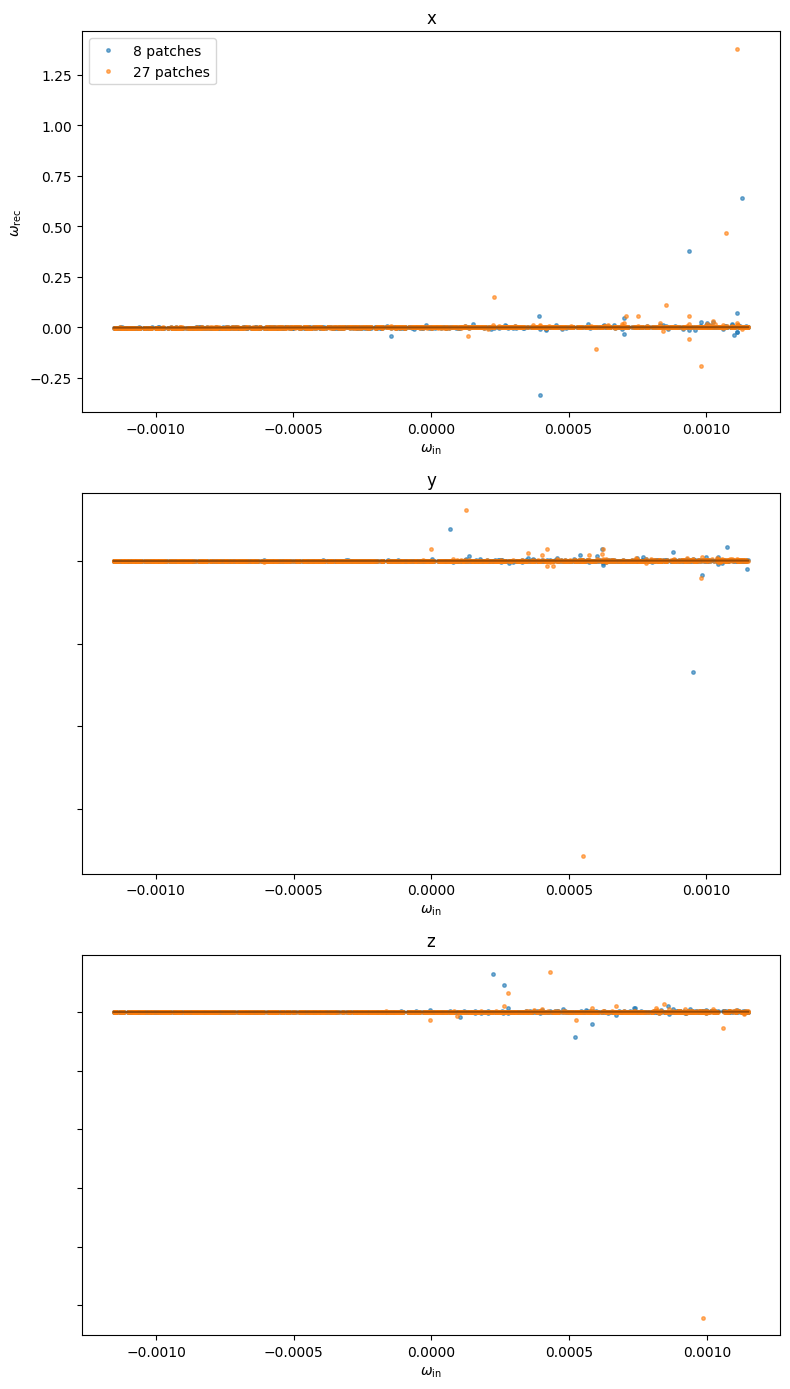

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(8,14))

comps = {0:'x', 1:'y', 2:'z'}
a = 0.6
ms = 5

for i, ax in enumerate(axs):
    x = np.linspace(np.amin(grads_in[:,i]), np.amax(grads_in[:,i]))
    ax.plot(grads_in[:,i], grads_rec8[:,i], marker='.', ms=ms, ls='None', alpha=a, label='8 patches')
    ax.plot(grads_in[:,i], grads_rec27[:,i], marker='.', ms=ms, ls='None', alpha=a, label='27 patches')
    
    ax.plot(x, x, color='k', alpha=0.4)
    # ax.set_aspect('equal')
    ax.set_xlabel(r'$\omega_{\mathrm{in}}$')
    if i==0:
        ax.set_ylabel(r'$\omega_{\mathrm{rec}}$')
        ax.legend()
    else:
        ax.yaxis.set_tick_params(labelleft=False)
    ax.set_title(comps[i])
fig.tight_layout()

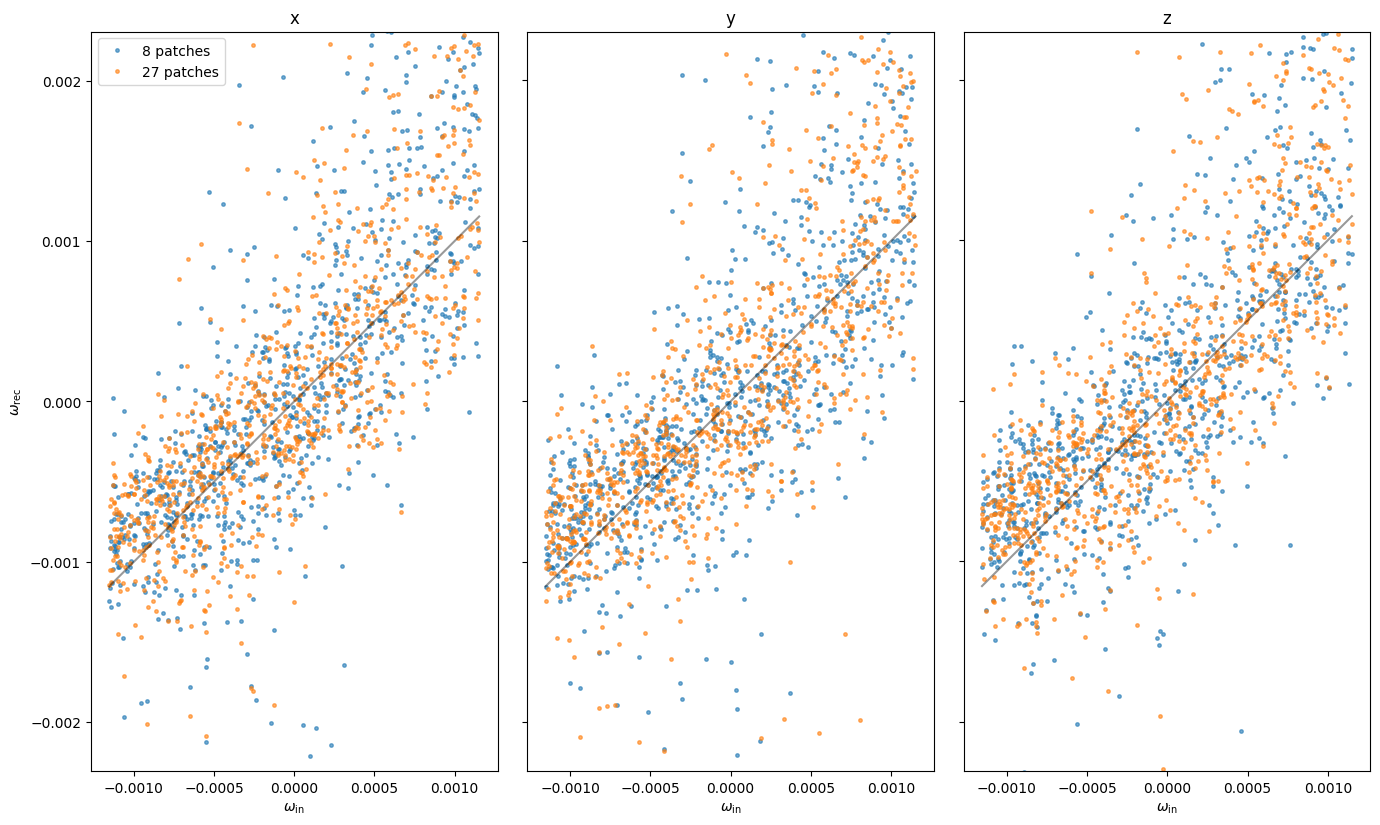

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(14,8))

comps = {0:'x', 1:'y', 2:'z'}
a = 0.6
ms = 5

for i, ax in enumerate(axs):
    x = np.linspace(np.amin(grads_in[:,i]), np.amax(grads_in[:,i]))
    ax.plot(grads_in[:,i], grads_rec8[:,i], marker='.', ms=ms, ls='None', alpha=a, label='8 patches')
    ax.plot(grads_in[:,i], grads_rec27[:,i], marker='.', ms=ms, ls='None', alpha=a, label='27 patches')
    
    ax.plot(x, x, color='k', alpha=0.4)
    ax.set_ylim((2*min(x), 2*max(x)))
    ax.set_aspect('equal')
    ax.set_xlabel(r'$\omega_{\mathrm{in}}$')
    if i==0:
        ax.set_ylabel(r'$\omega_{\mathrm{rec}}$')
        ax.legend()
    else:
        ax.yaxis.set_tick_params(labelleft=False)
    ax.set_title(comps[i])
fig.tight_layout()

In [10]:
# standard deviation
std_grad_8patches = np.std(grads_rec8, axis=0)
std_grad_27patches = np.std(grads_rec27, axis=0)

In [11]:
print(f"standard deviation in 8 patches for {mockset.mock_path}, m={m}, b={b}:")
print(std_grad_8patches)
print(f"standard deviation in 27 patches for \" :")
print(std_grad_27patches)

standard deviation in 8 patches for gradient/3D/random_omegas/L750_n2e-4_z057_patchy_As2x, m=0.75, b=0.5:
[0.0262172  0.02285156 0.01512531]
standard deviation in 27 patches for " :
[0.04708958 0.05764454 0.08354964]


In [14]:
# average residual
avg_res_8patches = np.mean(res8)
avg_res_27patches = np.mean(res27)

In [15]:
print(f"average residual in 8 patches for {mockset.mock_path}, m={m}, b={b}:")
print(avg_res_8patches)
print(f"average residual in 27 patches for \" :")
print(avg_res_27patches)

average residual in 8 patches for gradient/3D/random_omegas/L750_n2e-4_z057_patchy_As2x, m=0.75, b=0.5:
0.0005922413431080585
average residual in 27 patches for " :
-9.372590537502516e-05


### L750 n2e-4 lognormal

In [14]:
# mock params
L = 750
n = '2e-4'
As = 2
rlzs = 1000
mockset = MockSet(L, n, As=As, rlzs=rlzs)

#### input vs. recovered gradient amplitudes: 8 vs. 27 patches

In [15]:
amps8 = load_patch_amps(mockset, npatches=8)
amps27 = load_patch_amps(mockset, npatches=27)

In [16]:
grads_rec8 = (amps8[:,1:].T/amps8[:,0].T).T
grads_rec27 = (amps27[:,1:].T/amps27[:,0].T).T

In [17]:
# since there are no input gradients, it doesn't make sense to visualize the lognormal results
#  in the same way as the gradient results; but we can compare the standard deviations of recovered gradient amps.

In [18]:
std_ln_8patches = np.std(grads_rec8, axis=0)
std_ln_27patches = np.std(grads_rec27, axis=0)

In [19]:
print(f"standard deviation in 8 patches for {mockset.mock_path}, lognormal:")
print(std_grad_8patches)
print(f"standard deviation in 27 patches for \" :")
print(std_grad_27patches)

standard deviation in 8 patches for lognormal/L750_n2e-4_z057_patchy_As2x, lognormal:
[0.0262172  0.02285156 0.01512531]
standard deviation in 27 patches for " :
[0.04708958 0.05764454 0.08354964]


$\Longrightarrow$ Does this have to do with the expected bias-variance tradeoff?

As we increase $N_\mathrm{patches}$, do we expect to see higher variance and lower bias in the recovered gradient amplitudes?

#### check analogous plot for CFE